In [4]:
import comet_ml
import os
comet_ml.init(project_name='nfl-cv')

experiment = comet_ml.Experiment(
    api_key=os.getenv('BtVY5ezDYch67evljvtnup4E4'),
    project_name=os.getenv('nfl-cv')
)

COMET INFO: ---------------------------------------------------------------------------------------
COMET INFO: Comet.ml Experiment Summary
COMET INFO: ---------------------------------------------------------------------------------------
COMET INFO:   Data:
COMET INFO:     display_summary_level : 1
COMET INFO:     url                   : https://www.comet.com/tsigall/nfl-cv/913e376e7d944a28b5a412f00b2b3182
COMET INFO:   Others:
COMET INFO:     Created from                 : yolov8
COMET INFO:     eval_batch_logging_interval  : 1
COMET INFO:     log_confusion_matrix_on_eval : False
COMET INFO:     log_image_predictions        : True
COMET INFO:     max_image_predictions        : 100
COMET INFO:   Parameters:
COMET INFO:     agnostic_nms    : False
COMET INFO:     amp             : True
COMET INFO:     augment         : False
COMET INFO:     auto_augment    : randaugment
COMET INFO:     batch           : 16
COMET INFO:     box             : 7.5
COMET INFO:     cache           : False
C

In [5]:
import torch
from ultralytics import YOLO
model = YOLO('yolov8n.pt')
results = model.train(data='/Users/tsigall/Repositories/dsan6600/teacher.yaml', 
                        epochs=100, 
                        imgsz=1280, 
                        device='mps',
                        save = True,
                        save_period = 1)
experiment.end()

New https://pypi.org/project/ultralytics/8.2.2 available 😃 Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.1.29 🚀 Python-3.11.7 torch-2.2.2 MPS (Apple M2)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/Users/tsigall/Repositories/dsan6600/teacher.yaml, epochs=100, time=None, patience=100, batch=16, imgsz=1280, save=True, save_period=1, cache=False, device=mps, workers=8, project=None, name=train12, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, sav

train: Scanning /Users/tsigall/Repositories/dsan6600/datasets/teacher/labels/train.cache... 2778 images, 4 backgrounds, 0 corrupt: 100%|██████████| 2778/2778 [00:00<?, ?it/s]
val: Scanning /Users/tsigall/Repositories/dsan6600/datasets/teacher/labels/val.cache... 827 images, 0 backgrounds, 0 corrupt: 100%|██████████| 827/827 [00:00<?, ?it/s]

Plotting labels to runs/detect/train12/labels.jpg... 


optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 1280 train, 1280 val
Using 0 dataloader workers
Logging results to runs/detect/train12
Starting training for 100 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/174 [00:07<?, ?it/s]


RuntimeError: MPS backend out of memory (MPS allocated: 17.60 GB, other allocations: 454.00 MB, max allowed: 18.13 GB). Tried to allocate 200.00 MB on private pool. Use PYTORCH_MPS_HIGH_WATERMARK_RATIO=0.0 to disable upper limit for memory allocations (may cause system failure).

Downloading: "https://github.com/ultralytics/yolov5/zipball/master" to /Users/tsigall/.cache/torch/hub/master.zip
YOLOv5 🚀 v7.0-294-gdb125a20 Python-3.11.7 torch-2.2.2 CPU

Fusing layers... 
Model summary: 157 layers, 7012822 parameters, 0 gradients, 15.8 GFLOPs
Adding AutoShape... 


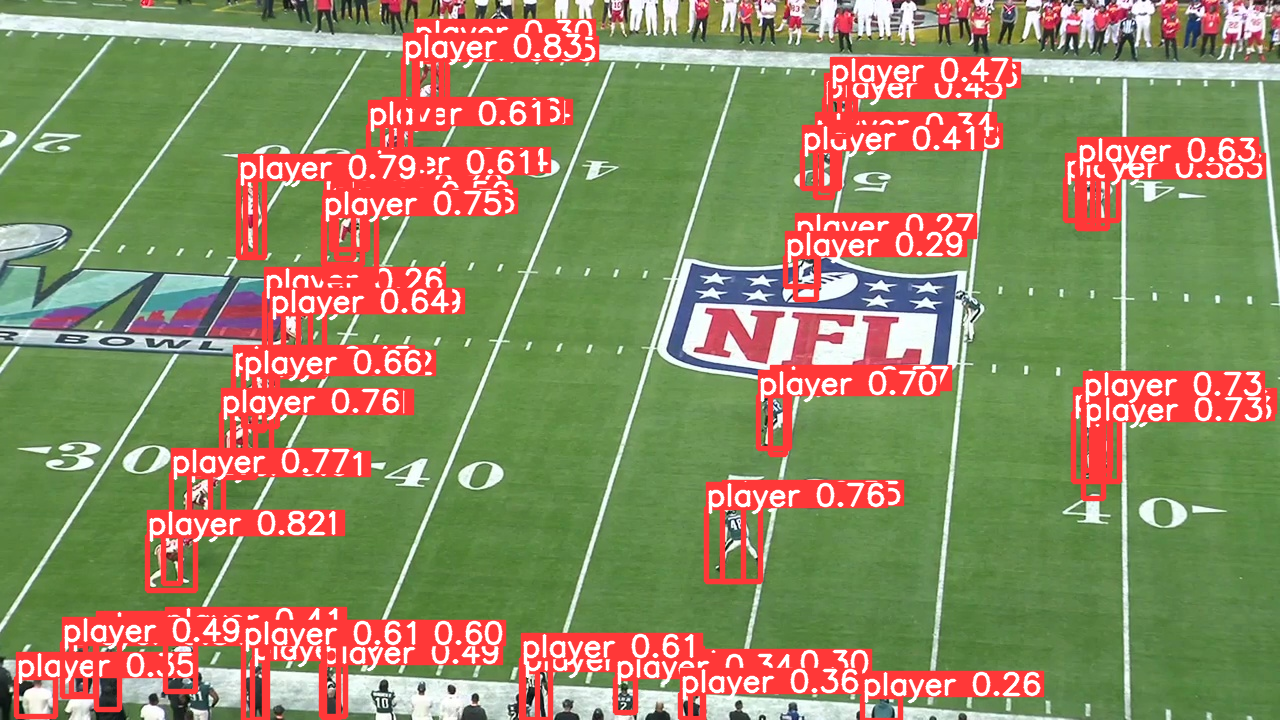

In [18]:
import cv2

best = 'runs/train/exp8/weights/best.pt'
model = torch.hub.load('ultralytics/yolov5', 'custom', path=best, force_reload=True)

x = '../frames/00000.jpg'
img = cv2.imread(x)  # BGR
results = model(x)

results.show()
